# **EMOTION-BASED-MUSIC-RECOMMENDATION SYSTEM**


---
 **Bangladesh University of Business and Technology**


---



> Md. Rashidul Haq

> Sojib hossain

> Abu Khayer Sheikh

> Mahamudul

> Jannatul Ferdus


---


Overleaf:

https://www.overleaf.com/read/bybtnctbfskw#cff893




---





Github:





---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Visualizing Classes**

In [ ]:
# train_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'
# test_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test'

In [ ]:
# train_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'
# test_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test'

# def Classes_Count( path, name):
#     Classes_Dict = {}

#     for Class in os.listdir(path):

#         Full_Path = path + Class
#         Classes_Dict[Class] = len(os.listdir(Full_Path))

#     df = pd.DataFrame(Classes_Dict, index=[name])

#     return df

# Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
# Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)

In [ ]:
import os
import pandas as pd

train_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'
test_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test'


# #for low dataset path
# train_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/data/train'
# test_dir = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/data/test'

def Classes_Count(path, name):
    Classes_Dict = {}

    for Class in os.listdir(path):
        # Use os.path.join to ensure the correct path is formed
        Full_Path = os.path.join(path, Class)
        # Check if Full_Path is a directory before listing
        if os.path.isdir(Full_Path):
            Classes_Dict[Class] = len(os.listdir(Full_Path))

    df = pd.DataFrame(Classes_Dict, index=[name])
    return df

try:
    Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
    Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
# Full_Path = os.path.join(path, Class)
# if os.path.isdir(Full_Path):
#     Classes_Dict[Class] = len(os.listdir(Full_Path))
# else:
#     print(f"Directory does not exist: {Full_Path}")


In [ ]:
# import os
# import pandas as pd

# def Classes_Count(path, name):
#     Classes_Dict = {}

#     for Class in os.listdir(path):
#         Full_Path = os.path.join(path, Class)
#         if os.path.isdir(Full_Path):
#             Classes_Dict[Class] = len(os.listdir(Full_Path))
#         else:
#             print(f"Directory does not exist: {Full_Path}")

#     df = pd.DataFrame(Classes_Dict, index=[name])
#     return df

# train_dir = 'your/train/directory/path'
# test_dir = 'your/test/directory/path'

# Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
# Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)


In [ ]:
pd.concat([Train_Count,Test_Count] , axis=1)

,Train,Test
happy,7235,1784
neutral,4969,1233
sad,4830,1247
angry,3995,958
surprise,3171,831


<Axes: >

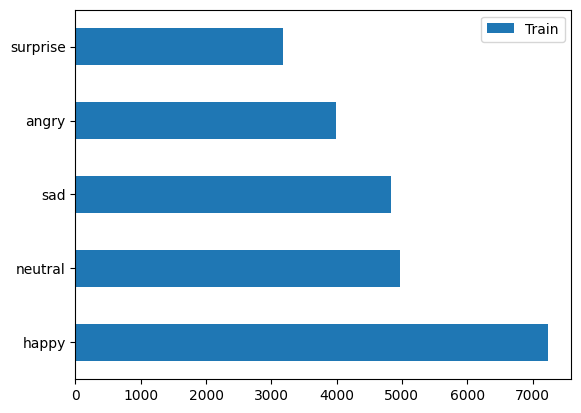

In [ ]:
Train_Count.plot(kind='barh')

<Axes: >

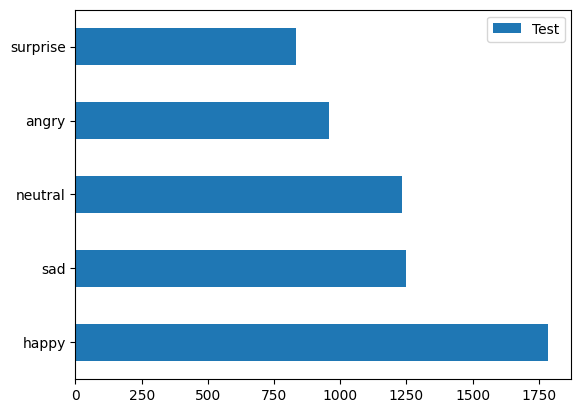

In [ ]:
Test_Count.plot(kind='barh')   #pychart

In [ ]:
# plt.style.use('default')
# plt.figure(figsize = (25, 8))
# image_count = 1
# BASE_URL = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'

# for directory in os.listdir(BASE_URL):
#     if directory[0] != '.':
#         for i, file in enumerate(os.listdir(BASE_URL + directory)):
#             if i == 1:
#                 break
#             else:
#                 fig = plt.subplot(1, 7, image_count)
#                 image_count += 1
#                 image = cv2.imread(BASE_URL + directory + '/' + file)
#                 plt.imshow(image)
#                 plt.title(directory, fontsize = 20)

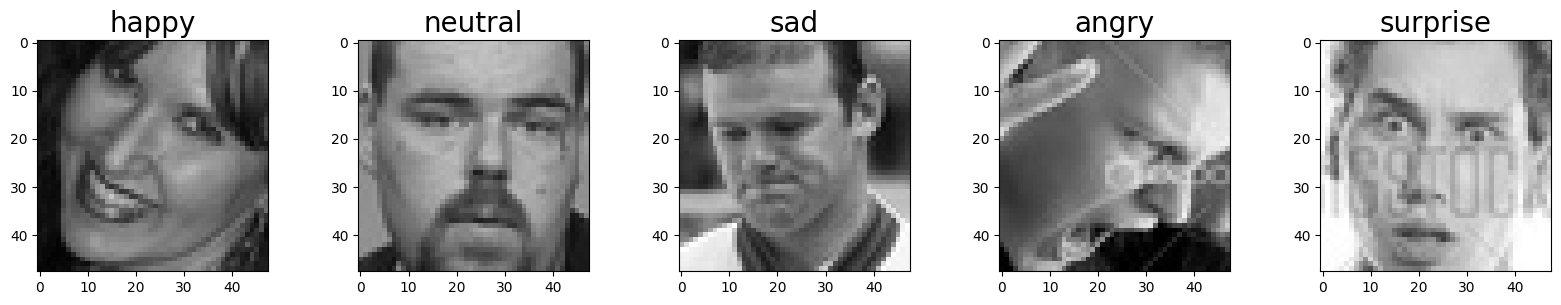

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt

plt.style.use('default')
plt.figure(figsize=(20, 3))
image_count = 1
BASE_URL = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'

for directory in os.listdir(BASE_URL):
    if directory[0] != '.': # hidden/ null
        directory_path = os.path.join(BASE_URL, directory) # Correctly join paths
        for i, file in enumerate(os.listdir(directory_path)): # iteration
            if i == 1:
                break
            else:
                fig = plt.subplot(1, 5, image_count) #single row 5 column
                image_count += 1 #increment 1 image
                file_path = os.path.join(directory_path, file) # Correctly join paths
                image = cv2.imread(file_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB
                plt.imshow(image)
                plt.title(directory, fontsize=20)

plt.show() # Display the figure after plotting all images


# **Data Preprocessing**

In [ ]:
img_shape = 48    #48*48 pixel
batch_size = 64   # 64 per batch
train_data_path = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'
test_data_path = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test'

In [ ]:
train_preprocessor = ImageDataGenerator(
        rescale = 1. / 255,
        # Data Augmentation
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1. / 255,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)


test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 24200 images belonging to 5 classes.
Found 6053 images belonging to 5 classes.


# **MODEL**

# **Building CNN Model**

In [ ]:
def Create_CNN_Model():

    model = Sequential()

    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))   #filter size, kernel size , relu ng-pos,
    model.add(BatchNormalization()) #  improve training stability and accelerate convergence.

    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))  # adding more pixel
    model.add(Dropout(0.25))  # reduce overfitting 25%

    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())

    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))

    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))


    #Output
    model.add(Flatten())  # 1d

    model.add(Dense(1024, activation='relu'))  #fully connected layer
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(5,activation='softmax') )    # output layer


    return model

In [ ]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])  # make weight and update, multiclass

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                        

**Specifying Callbacks**

In [ ]:
# Create Callback Checkpoint
checkpoint_path = "CNN_Model_Checkpoint" # weight save this path

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True) #is used to save the model's weights during training

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 15, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning rate
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.000005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [ ]:
CNN_history = CNN_Model.fit( train_data , validation_data= test_data , epochs=50, batch_size= batch_size,
                            callbacks=callbacks, steps_per_epoch= steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50
378/378 [==============================] - 7697s 20s/step - loss: 1.7510 - accuracy: 0.2476 - val_loss: 1.6531 - val_accuracy: 0.3005 - lr: 0.0010
Epoch 2/50
378/378 [==============================] - 73s 192ms/step - loss: 1.5222 - accuracy: 0.3247 - val_loss: 1.3325 - val_accuracy: 0.4410 - lr: 0.0010
Epoch 3/50
378/378 [==============================] - 73s 194ms/step - loss: 1.3827 - accuracy: 0.4097 - val_loss: 1.1975 - val_accuracy: 0.4894 - lr: 0.0010
Epoch 4/50
378/378 [==============================] - 73s 194ms/step - loss: 1.2485 - accuracy: 0.4824 - val_loss: 1.1235 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 5/50
378/378 [==============================] - 78s 206ms/step - loss: 1.1569 - accuracy: 0.5302 - val_loss: 1.0445 - val_accuracy: 0.5811 - lr: 0.0010
Epoch 6/50
378/378 [==============================] - 77s 205ms/step - loss: 1.0990 - accuracy: 0.5589 - val_loss: 0.9886 - val_accuracy: 0.6019 - lr: 0.0010
Epoch 7/50
378/378 [==============================] 

In [ ]:
# # Assuming train_data and test_data are generators
# steps_per_epoch = len(train_data)  # Number of batches per epoch
# validation_steps = len(test_data)  # Number of batches for validation

# CNN_history = CNN_Model.fit(
#     train_data,
#     validation_data=test_data,
#     epochs=50,
#     batch_size=batch_size,
#     callbacks=callbacks,
#     steps_per_epoch=steps_per_epoch,
#     validation_steps=validation_steps
# )


# **Evaluating CNN Model**

In [ ]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

95/95 [==============================] - 10s 105ms/step - loss: 0.7005 - accuracy: 0.7292
    Test Loss: 0.70048
Test Accuracy: 72.92%


In [ ]:
CNN_Score = CNN_Model.evaluate(train_data)

print("    Train Loss: {:.5f}".format(CNN_Score[0]))
print("Train Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

379/379 [==============================] - 60s 159ms/step - loss: 0.6505 - accuracy: 0.7561
    Train Loss: 0.65053
Train Accuracy: 75.61%


In [ ]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

  #plt.tight_layout()

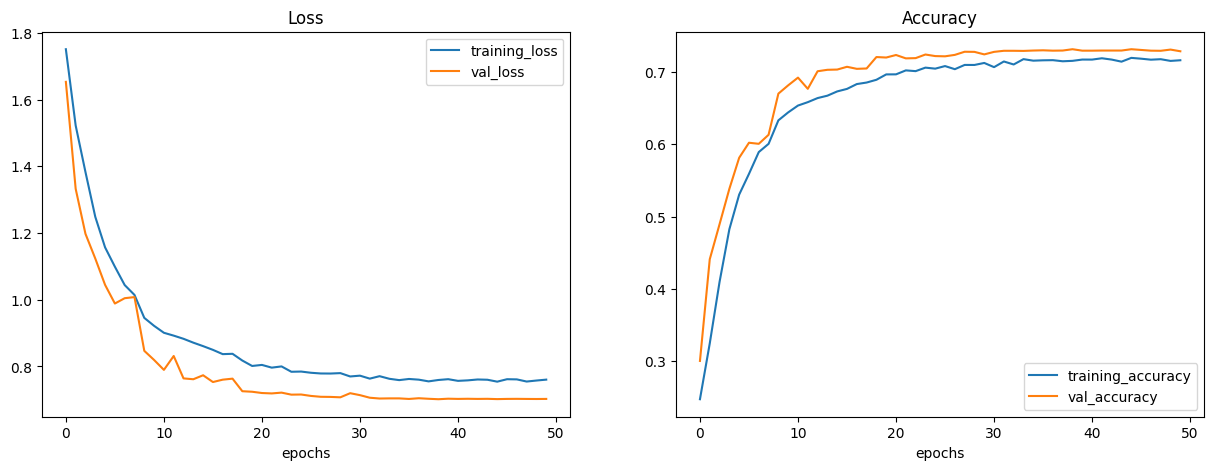

In [ ]:
plot_curves(CNN_history)

In [ ]:
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

95/95 [==============================] - 10s 100ms/step


In [ ]:
test_data.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4}

Text(0.5, 1.0, 'CNN Confusion Matrix')

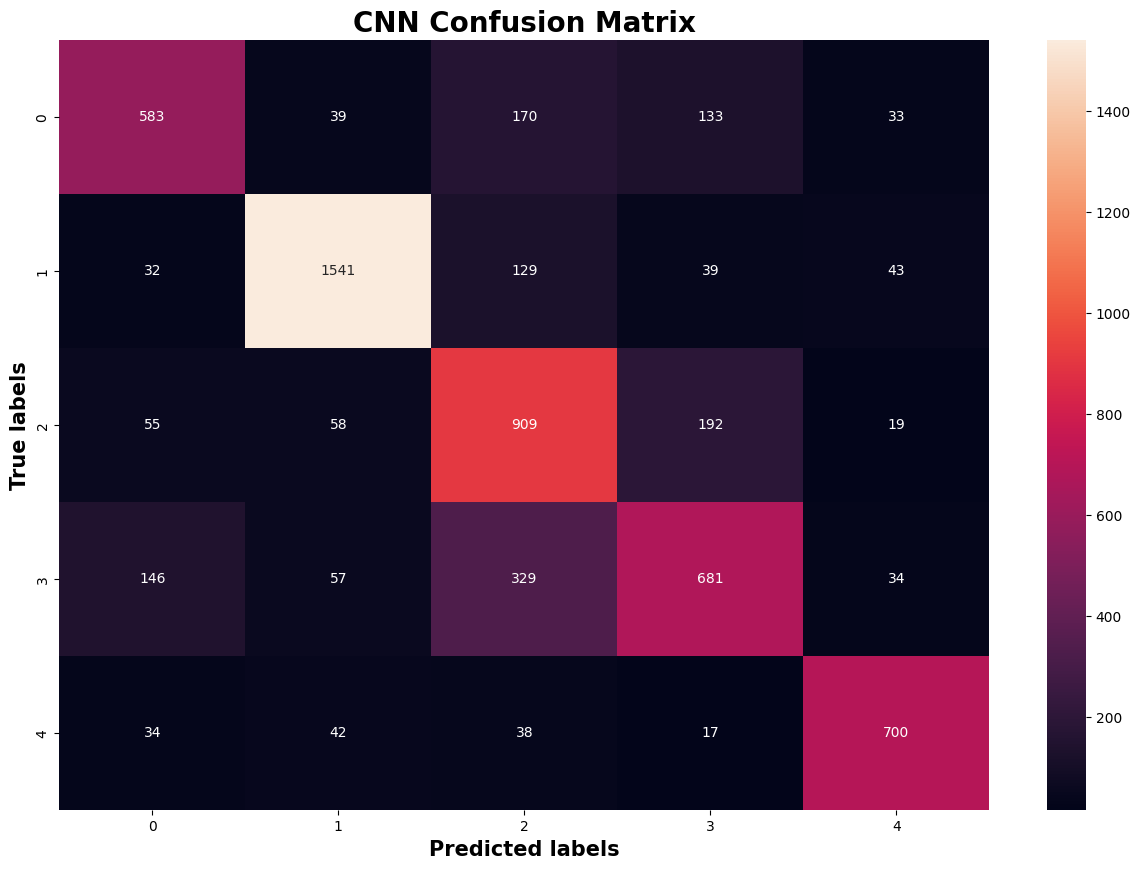

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

# **ResNet50V2 Model**

In [3]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64   #64
train_data_path = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/train'
test_data_path = '/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test'

In [4]:
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )


test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

train_data = train_preprocessor.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)

test_data = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 24200 images belonging to 5 classes.
Found 6053 images belonging to 5 classes.


# **Fine-Tuning ResNet50V2**

In [5]:
# 224,224,3
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

#ResNet50V2.summary()

94668760/94668760 [==============================] - 5s 0us/step


In [6]:
# Freezing all layers except last 50

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [7]:
def Create_ResNet50V2_Model():

    model = Sequential([
                      ResNet50V2,
                      Dropout(.25),
                      BatchNormalization(),
                      Flatten(),
                      Dense(64, activation='relu'),
                      BatchNormalization(),
                      Dropout(.5),
                      Dense(5,activation='softmax')
                    ])
    return model

In [ ]:
ResNet50V2_Model = Create_ResNet50V2_Model()

ResNet50V2_Model.summary()

ResNet50V2_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout_9 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization_12 (Ba  (None, 7, 7, 2048)        8192      
 tchNormalization)                                               
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_7 (Dense)             (None, 64)                6422592   
                                                                 
 batch_normalization_13 (Ba  (None, 64)                256       
 tchNormalization)                                    

**Specifying Callbacks**

In [ ]:
# Create Callback Checkpoint
checkpoint_path = "ResNet50V2_Model_Checkpoint"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.2,
                                                  patience=2,
#                                                   min_lr=0.00005,
                                                  verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [ ]:
ResNet50V2_history = ResNet50V2_Model.fit(train_data ,validation_data = test_data , epochs=30, batch_size=batch_size,
                                         callbacks = callbacks, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/30

448/448 [==============================] - 335s 739ms/step - loss: 1.5019 - accuracy: 0.4698 - val_loss: 4.4399 - val_accuracy: 0.4833 - lr: 0.0010

Epoch 2/30

448/448 [==============================] - 328s 732ms/step - loss: 1.2341 - accuracy: 0.5523 - val_loss: 1.3064 - val_accuracy: 0.5449 - lr: 0.0010

Epoch 3/30

448/448 [==============================] - 328s 732ms/step - loss: 1.1402 - accuracy: 0.5857 - val_loss: 1.0715 - val_accuracy: 0.6000 - lr: 0.0010

Epoch 4/30

448/448 [==============================] - 325s 725ms/step - loss: 1.0697 - accuracy: 0.6130 - val_loss: 1.0588 - val_accuracy: 0.6164 - lr: 0.0010

Epoch 5/30

448/448 [==============================] - 328s 733ms/step - loss: 1.0350 - accuracy: 0.6254 - val_loss: 1.0224 - val_accuracy: 0.6226 - lr: 0.0010

Epoch 6/30

448/448 [==============================] - 335s 747ms/step - loss: 1.0101 - accuracy: 0.6334 - val_loss: 1.0358 - val_accuracy: 0.6247 - lr: 0.0010

Epoch 7/30

448/448 [=============

# **Evaluating ResNet50V2**

In [ ]:
ResNet50V2_Score = ResNet50V2_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(ResNet50V2_Score[0]))
print("Test Accuracy: {:.2f}%".format(ResNet50V2_Score[1] * 100))

113/113 [==============================] - 20s 176ms/step - loss: 0.9064 - accuracy: 0.6900

    Test Loss: 0.90638

Test Accuracy: 69.00%


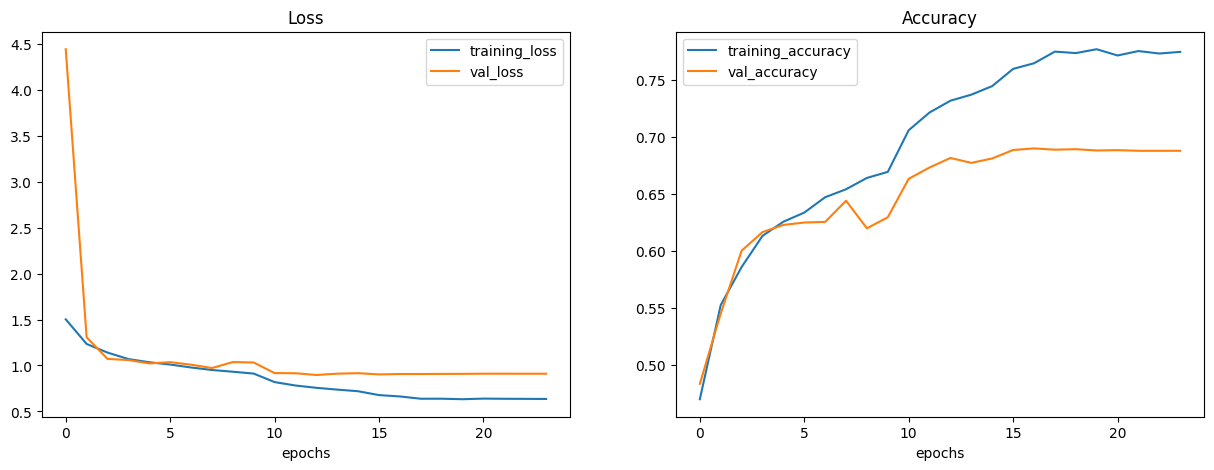

In [ ]:
plot_curves(ResNet50V2_history)

In [ ]:
ResNet50V2_Predictions = ResNet50V2_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction
ResNet50V2_Predictions = np.argmax(ResNet50V2_Predictions, axis=1)

113/113 [==============================] - 19s 163ms/step


Text(0.5, 1.0, 'ResNet50V2 Confusion Matrix')

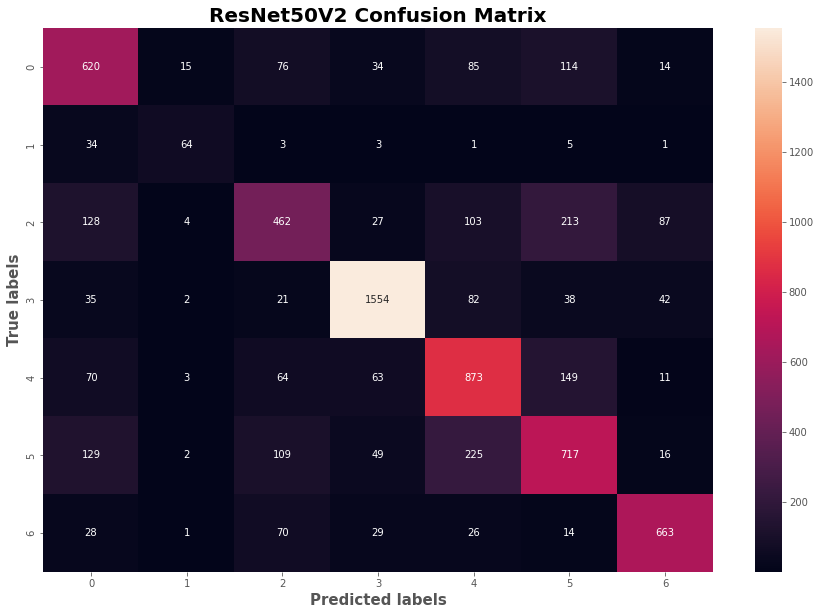

In [ ]:
fig , ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, ResNet50V2_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('ResNet50V2 Confusion Matrix', fontsize=20, fontweight='bold')

# **Visualizing Predictions**

In [8]:
# Emotion_Classes = ['Angry',
#                   'Disgust',
#                   'Fear',
#                   'Happy',
#                   'Neutral',
#                   'Sad',
#                   'Surprise']


Emotion_Classes = ['Angry',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [9]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1. / 255,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 6053 images belonging to 5 classes.


**CNN Predictions**

In [ ]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(CNN_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # # Assuming you have a test generator, CNN_Model, batch_size, and Emotion_Classes defined
# # test_generator = ...
# # CNN_Model = ...
# # batch_size = ...
# # Emotion_Classes = ...

# Display 10 random pictures from the dataset with their labels
Random_batch = np.random.randint(0, len(test_generator) - 1)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img_Index = np.random.randint(0, batch_size - 1)
    Random_Img = test_generator[Random_batch][0][Random_Img_Index]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index])

    # Assuming the input shape of your model is (height, width, channels)
    Random_Img = tf.expand_dims(Random_Img, axis=0)

    # Debugging: Print the shape before prediction
    print("Input Image Shape:", Random_Img.shape)

    # Make predictions
    Model_Prediction = CNN_Model.predict(Random_Img, verbose=0)

    # Debugging: Print the prediction shape
    print("Prediction Shape:", Model_Prediction.shape)

    Model_Prediction = np.argmax(Model_Prediction)

    ax.imshow(Random_Img[0])  # Assuming the shape is (1, height, width, channels)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.show()
plt.tight_layout()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_generator is a data generator for testing
# CNN_Model is your trained CNN model
# Emotion_Classes is a list of emotion classes

# Set your batch size
batch_size = 32

# Assuming your images are originally 224x224
original_image_size = (224, 224)

Random_batch = np.random.randint(0, len(test_generator) - 1)
Random_Img_Index = np.random.randint(0, batch_size - 1, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    # Resize the image to match the expected input shape of the model
    resized_img = tf.image.resize(Random_Img, (48, 48))

    Model_Prediction = np.argmax(CNN_Model.predict(tf.expand_dims(resized_img, axis=0), verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.show()
plt.tight_layout()


Resnet prediction


In [ ]:
# Display 10 random pictures from the dataset with their labels

Random_batch = np.random.randint(0, len(test_generator) - 1)

Random_Img_Index = np.random.randint(0, batch_size - 1 , 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]

    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]])

    Model_Prediction = np.argmax(ResNet50V2_Model.predict( tf.expand_dims(Random_Img, axis=0) , verbose=0))

    ax.imshow(Random_Img)

    if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction]:
          color = "green"
    else:
          color = "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)
plt.show()
plt.tight_layout()

# **Music Player**

In [10]:
Music_Player = pd.read_csv("/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/MusicDataset/data_moods.csv")
Music_Player = Music_Player[['name','artist','mood','popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [11]:
Music_Player["mood"].value_counts()

Sad          197
Calm         195
Energetic    154
Happy        140
Name: mood, dtype: int64

In [12]:
Music_Player["popularity"].value_counts()

0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: popularity, Length: 83, dtype: int64

In [13]:
Play = Music_Player[Music_Player['mood'] =='Calm' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


In [14]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):

    if( pred_class=='Disgust' ):

        Play = Music_Player[Music_Player['mood'] =='Sad' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Play = Music_Player[Music_Player['mood'] =='Happy' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Play = Music_Player[Music_Player['mood'] =='Calm' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Play = Music_Player[Music_Player['mood'] =='Energetic' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

# **Predicting New Images**

**Downloading OpenCV haarcascade frontalface Detection**

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [ ]:
def load_and_prep_image(filename, img_shape = 224):

    img = cv2.imread(filename)

    GrayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)

    for x,y,w,h in faces:

        roi_GrayImg = GrayImg[ y: y + h , x: x + w ]
        roi_Img = img[ y: y + h , x: x + w ]

        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

        faces = faceCascade.detectMultiScale(roi_Img, 1.1, 4)

        if len(faces) == 0:
            print("No Faces Detected")
        else:
            for (ex, ey, ew, eh) in faces:
                img = roi_Img[ ey: ey+eh , ex: ex+ew ]

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    RGBImg= cv2.resize(RGBImg,(img_shape,img_shape))

    RGBImg = RGBImg/255.

    return RGBImg

In [ ]:
def pred_and_plot(filename, class_names):

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = ResNet50V2_Model.predict(np.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[pred.argmax()]

    # Plot the image and predicted class
    #plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

    Recommend_Songs(pred_class)

,name,artist,mood,popularity
0,Pumped Up Kicks,Foster The People,Happy,84
1,Africa,TOTO,Happy,84
2,Take on Me,a-ha,Happy,84
3,Highway to Hell,AC/DC,Happy,83
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83


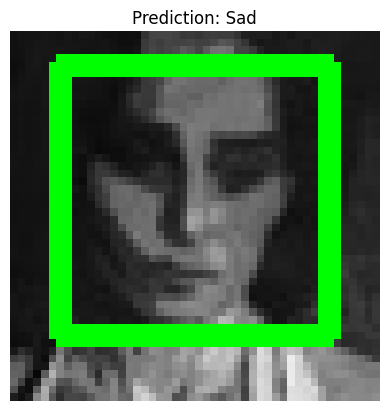

In [ ]:
pred_and_plot("../input/fer2013/test/sad/PrivateTest_13472479.jpg", Emotion_Classes) # with CNN

In [ ]:
# Downloading Image to Test On
!wget -c "https://pbs.twimg.com/media/EEY3RFFWwAAc-qm.jpg" -O sad.jpg

In [ ]:
pred_and_plot("/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test/angry/PrivateTest_12766285.jpg", Emotion_Classes) # with CNN

,name,artist,mood,popularity
0,Pumped Up Kicks,Foster The People,Happy,84
1,Africa,TOTO,Happy,84
2,Take on Me,a-ha,Happy,84
3,Highway to Hell,AC/DC,Happy,83
4,Here Comes The Sun - Remastered 2009,The Beatles,Happy,83


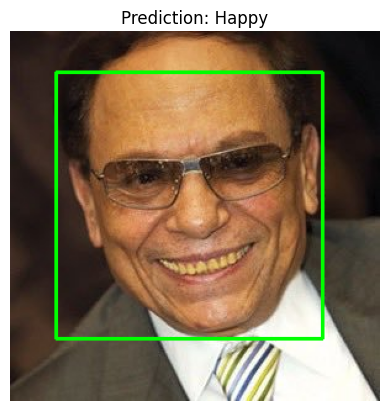

In [ ]:
pred_and_plot("./happy.jpg", Emotion_Classes) # with CNN

In [ ]:
pred_and_plot("/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/dataset/FER2013/test/angry/PrivateTest_10131363.jpg", Emotion_Classes) # with ResNet50V2

In [ ]:
# Downloading Image to Test On
!wget -c "https://pbs.twimg.com/profile_images/758370732413947904/xYB5Q3FY_400x400.jpg" -O happy.jpg

In [ ]:
pred_and_plot("./sad.jpg", Emotion_Classes) # with ResNet50V2

In [ ]:
CNN_Model.save("CNN_Model.h5")

# ResNet50V2_Model.save("ResNet50V2_Model.h5")

In [ ]:
pred_and_plot("/content/12.jpg", Emotion_Classes) # with CNN

cnn h5 model create


In [ ]:
import os
target_directory= "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model"
if not os.path.exists(target_directory):
            os.mkdir(target_directory)

In [ ]:
CNN_Model.save("/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/model.h5")
CNN_Model.save_weights("/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/weights.h5")

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
from PIL import Image, ImageTk
from io import BytesIO
import requests
from tkinter import Tk, Label, Canvas, NW, Entry, Button
from keras.preprocessing import image as image_utils

In [ ]:
image_weight, image_height=128,128
model_path= "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/model.h5"
model_weight_path="/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/weights.h5"
model= load_model(model_path)
model.load_weights(model_weight_path)

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


In [ ]:
# from IPython.display import display, HTML
# from PIL import Image
# import requests
# from io import BytesIO

# # Function to display an image from URL
# def display_image_from_url(url):
#     response = requests.get(url)
#     img = Image.open(BytesIO(response.content))
#     display(img)

# # Example usage:
# url = input("Please enter image URL: ")
# display_image_from_url(url)


In [ ]:
import tensorflow as tf
from IPython.display import display, HTML
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image as image_utils
import ipywidgets as widgets

# Assuming your model is loaded as 'model'
model_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/model.h5"
model_weight_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/weights.h5"
model = load_model(model_path)
model.load_weights(model_weight_path)

# Function to handle button click
def on_button_click(b):
    global url
    url = text_input.value
    print(url)

    response = requests.get(url)
    test_image = Image.open(BytesIO(response.content))
    put_image = test_image.resize((400, 400))

    # Resize the image to match the expected input shape of the model
    test_image_resized = tf.image.resize(np.array(test_image), (48, 48))

    # Display the resized image
    display(put_image)

    test_image_resized = np.expand_dims(test_image_resized, axis=0)

    result = model.predict_on_batch(test_image_resized)

    if result[0, 0] == 1:
        ans = "Angry"
    elif result[0, 1] == 1:
        ans = "Happy"
    elif result[0, 2] == 1:
        ans = "Neutral"
    elif result[0, 3] == 1:
        ans = "Sad"
    elif result[0, 4] == 1:
        ans = "Surprise"

    print(f"Predicted emotion: {ans}")

# Create input text box and button
text_input = widgets.Text(placeholder='Enter image URL')
button = widgets.Button(description='Predict Emotion')
button.on_click(on_button_click)

# Display the widgets
display(text_input)
display(button)


In [ ]:
import tensorflow as tf
from IPython.display import display, HTML
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import ipywidgets as widgets

# Assuming your model is loaded as 'model'
model_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/model.h5"
model_weight_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/weights.h5"
model = load_model(model_path)
model.load_weights(model_weight_path)

# Load your music dataset (assuming it has columns 'mood' and 'audio_file')
music_dataset_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/MusicDataset/data_moods.csv"
music_dataset = pd.read_csv(music_dataset_path)

# Function to handle button click
def on_button_click(b):
    global url
    url = text_input.value
    print(url)

    response = requests.get(url)
    test_image = Image.open(BytesIO(response.content))
    put_image = test_image.resize((400, 400))

    # Resize the image to match the expected input shape of the model
    test_image_resized = tf.image.resize(np.array(test_image), (48, 48))

    # Display the resized image
    display(put_image)

    test_image_resized = np.expand_dims(test_image_resized, axis=0)

    result = model.predict_on_batch(test_image_resized)

    if result[0, 0] == 1:
        ans = "Angry"
    elif result[0, 1] == 1:
        ans = "Happy"
    elif result[0, 2] == 1:
        ans = "Neutral"
    elif result[0, 3] == 1:
        ans = "Sad"
    elif result[0, 4] == 1:
        ans = "Surprise"
    else:
        ans = "Unknown"

    print(f"Predicted emotion: {ans}")

    # Call music recommendation function
    Recommend_Songs(ans)

# Create input text box and button
text_input = widgets.Text(placeholder='Enter image URL')
button = widgets.Button(description='Predict Emotion')
button.on_click(on_button_click)

# Display the widgets
display(text_input)
display(button)

# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):
    if pred_class == 'Angry':
        mood_category = 'Calm'
    elif pred_class == 'Happy' or pred_class == 'Sad':
        mood_category = 'Happy'
    elif pred_class == 'Neutral' or pred_class == 'Surprise':
        mood_category = 'Energetic'
    elif pred_class == 'Disgust':
        mood_category = 'Sad'
    else:
        mood_category = 'Unknown'

    Play = music_dataset[music_dataset['mood'] == mood_category]
    Play = Play.sort_values(by="popularity", ascending=False)
    Play = Play[:5].reset_index(drop=True)
    print(f"Music suggestion for {pred_class}:")
    display(Play)


In [ ]:
!pip install gradio

In [ ]:
# !pip install typing-extensions==3.10.0.0


In [ ]:
!pip install -U gradio


# **gradio**

# for url image

In [ ]:
import gradio as gr
import tensorflow as tf
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Assuming your model is loaded as 'model'
model_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/model.h5"
model_weight_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/weights.h5"
model = load_model(model_path)
model.load_weights(model_weight_path)

# Load your music dataset (assuming it has columns 'mood' and 'audio_file')
music_dataset_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/MusicDataset/data_moods.csv"
music_dataset = pd.read_csv(music_dataset_path)

# Function to predict emotion and recommend songs
def predict_emotion_and_recommend(url):
    response = requests.get(url)
    test_image = Image.open(BytesIO(response.content))

    # Resize the image to match the expected input shape of the model
    test_image_resized = tf.image.resize(np.array(test_image), (48, 48))
    test_image_resized = np.expand_dims(test_image_resized, axis=0)

    result = model.predict_on_batch(test_image_resized)

    if result[0, 0] == 1:
        pred_class = "Angry"
    elif result[0, 1] == 1:
        pred_class = "Happy"
    elif result[0, 2] == 1:
        pred_class = "Neutral"
    elif result[0, 3] == 1:
        pred_class = "Sad"
    elif result[0, 4] == 1:
        pred_class = "Surprise"
    else:
        pred_class = "Unknown"

    # Call music recommendation function
    return f"Predicted emotion: {pred_class}", recommend_songs(pred_class)

# # Function to recommend songs based on predicted class
# def recommend_songs(pred_class):
#     if pred_class == 'Angry':
#         mood_category = 'Calm'
#     elif pred_class == 'Happy' or pred_class == 'Sad':
#         mood_category = 'Happy'
#     elif pred_class == 'Neutral' or pred_class == 'Surprise':
#         mood_category = 'Energetic'
#     elif pred_class == 'Disgust':
#         mood_category = 'Sad'
#     else:
#         mood_category = 'Unknown'

#     Play = music_dataset[music_dataset['mood'] == mood_category]
#     Play = Play.sort_values(by="popularity", ascending=False)
#     Play = Play[:5].reset_index(drop=True)

#     return Play


# Function to recommend songs based on predicted class
def recommend_songs(pred_class):
    if pred_class == 'Angry':
        mood_category = 'Calm'
    elif pred_class == 'Happy' or pred_class == 'Sad':
        mood_category = 'Happy'
    elif pred_class == 'Neutral' or pred_class == 'Surprise':
        mood_category = 'Energetic'
    elif pred_class == 'Disgust':
        mood_category = 'Sad'
    else:
        mood_category = 'Unknown'

    songs = music_dataset[music_dataset['mood'] == mood_category]
    songs = songs.sort_values(by="popularity", ascending=False)
    songs = songs.head(5).reset_index(drop=True)

    # Select only the desired columns
    selected_columns = ['name', 'artist', 'mood', 'popularity']
    selected_songs = songs[selected_columns]

    return selected_songs

# Create a Gradio interface
iface = gr.Interface(fn=predict_emotion_and_recommend, inputs="text", outputs=["text", "text"])
iface.launch()


# For direct image input

In [ ]:
import gradio as gr
import tensorflow as tf
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.models import load_model
import requests
import pandas as pd

# Assuming your model is loaded as 'model'
model_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/model.h5"
model_weight_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/model/weights.h5"
model = load_model(model_path)
model.load_weights(model_weight_path)

# Load your music dataset (assuming it has columns 'mood' and 'audio_file')
music_dataset_path = "/content/drive/MyDrive/Facial emotion recog & Music Sugg/f2/MusicDataset/data_moods.csv"
music_dataset = pd.read_csv(music_dataset_path)

# Function to predict emotion and recommend songs
def predict_emotion_and_recommend(image):
    # Resize the image to match the expected input shape of the model
    test_image_resized = tf.image.resize(np.array(image), (48, 48))
    test_image_resized = np.expand_dims(test_image_resized, axis=0)

    result = model.predict_on_batch(test_image_resized)

    if result[0, 0] == 1:
        pred_class = "Neutral"
    elif result[0, 1] == 1:
        pred_class = "Angry"
    elif result[0, 2] == 1:
        pred_class = "Happy"
    elif result[0, 3] == 1:
        pred_class = "Sad"
    elif result[0, 4] == 1:
        pred_class = "Surprise"
    else:
        pred_class = "Unknown"

    # Call music recommendation function
    return f"Predicted emotion: {pred_class}", recommend_songs(pred_class)

# # Function to recommend songs based on predicted class
# def recommend_songs(pred_class):
#     if pred_class == 'Angry':
#         mood_category = 'Calm'
#     elif pred_class == 'Happy' or pred_class == 'Sad':
#         mood_category = 'Happy'
#     elif pred_class == 'Neutral' or pred_class == 'Surprise':
#         mood_category = 'Energetic'
#     elif pred_class == 'Disgust':
#         mood_category = 'Sad'
#     else:
#         mood_category = 'Unknown'

#     Play = music_dataset[music_dataset['mood'] == mood_category]
#     Play = Play.sort_values(by="popularity", ascending=False)
#     Play = Play[:5].reset_index(drop=True)

#     return Play

# Function to recommend songs based on predicted class
def recommend_songs(pred_class):
    if pred_class == 'Angry':
        mood_category = 'Calm'
    elif pred_class == 'Happy' or pred_class == 'Sad':
        mood_category = 'Happy'
    elif pred_class == 'Neutral' or pred_class == 'Surprise':
        mood_category = 'Energetic'
    elif pred_class == 'Disgust':
        mood_category = 'Sad'
    else:
        mood_category = 'Unknown'

    songs = music_dataset[music_dataset['mood'] == mood_category]
    songs = songs.sort_values(by="popularity", ascending=False)
    songs = songs.head(5).reset_index(drop=True)

    # Select only the desired columns
    selected_columns = ['name', 'artist', 'mood', 'popularity']
    selected_songs = songs[selected_columns]

    return selected_songs


# Create a Gradio interface
iface = gr.Interface(
    fn=predict_emotion_and_recommend,
    inputs=gr.Image(),
    outputs=["text", "text"]
)

iface.launch()
